In [1]:
pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.2 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mne 
import pandas as pd
import matplotlib.pyplot as plt
raw = mne.io.read_raw_edf('S001R01.edf')
start_time = 0.0
stop_time = 5.0
df = raw.copy().crop(start_time, stop_time).to_data_frame()
print(df.head())
df.to_csv('subject.csv')

Extracting EDF parameters from /home/jovyan/PlanetaryComputerExamples/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
      time  Fc5.  Fc3.  Fc1.  Fcz.  Fc2.  Fc4.  Fc6.  C5..  C3..  ...  P8..  \
0  0.00000 -16.0 -29.0   2.0  22.0 -12.0 -23.0 -46.0 -36.0 -26.0  ... -30.0   
1  0.00625 -56.0 -54.0 -27.0  -4.0 -31.0 -36.0 -56.0 -75.0 -55.0  ... -20.0   
2  0.01250 -55.0 -55.0 -29.0  -5.0 -29.0 -34.0 -52.0 -53.0 -42.0  ... -20.0   
3  0.01875 -50.0 -44.0 -13.0  13.0 -16.0 -25.0 -45.0 -44.0 -21.0  ... -16.0   
4  0.02500 -36.0 -28.0  13.0  42.0   9.0 -10.0 -46.0 -34.0 -12.0  ...  -9.0   

   Po7.  Po3.  Poz.  Po4.  Po8.  O1..  Oz..  O2..  Iz..  
0 -56.0 -52.0 -35.0 -22.0 -33.0 -53.0 -21.0 -11.0  15.0  
1 -35.0 -29.0 -18.0  -3.0  -9.0 -53.0 -12.0   1.0  21.0  
2 -23.0 -12.0  -6.0   4.0  -7.0 -45.0   2.0  18.0  35.0  
3 -12.0   4.0  14.0  20.0   7.0 -29.0  16.0  35.0  47.0  
4  -7.0   6.0  20.0  24.0   6.0 -13.0  29.0  40.0  50.0  

[5 rows 

Index(['time', 'Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..',
       'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.',
       'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.',
       'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..',
       'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.',
       'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..',
       'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..',
       'O2..', 'Iz..'],
      dtype='object')


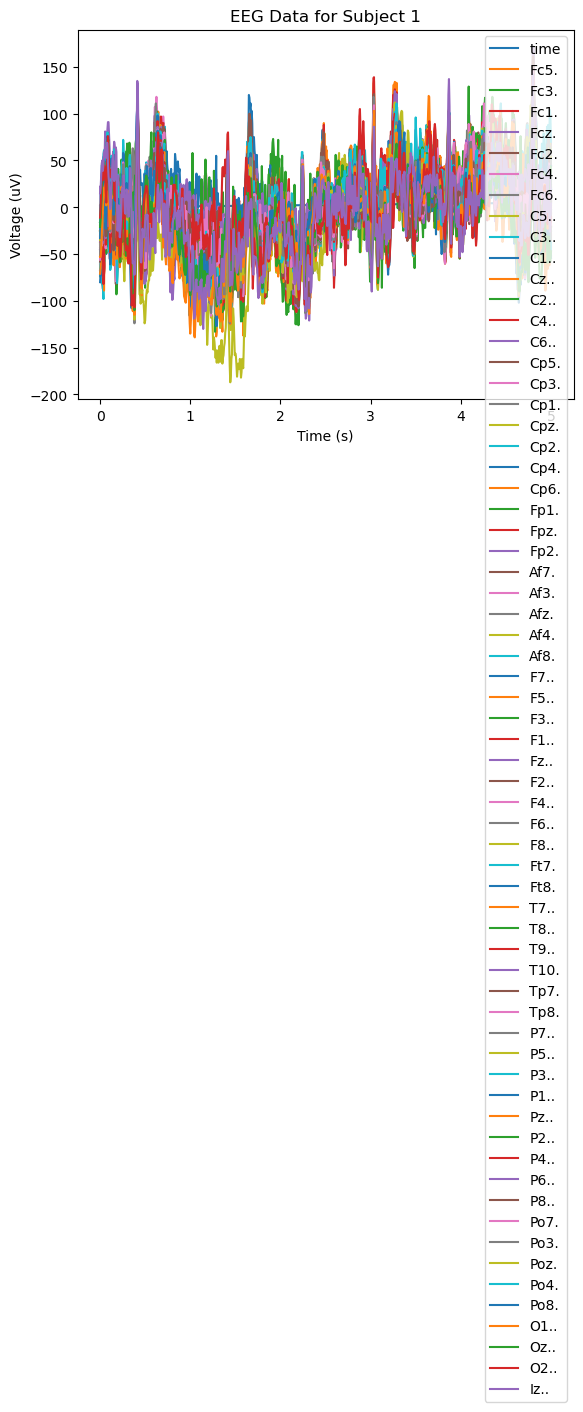

       Unnamed: 0        time        Fc5.        Fc3.        Fc1.       Fcz.  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.00000   
mean   400.000000    2.500000    4.027466    0.488140    0.461923   -0.28839   
std    231.373075    1.446082   35.064858   44.082028   43.942649   49.85008   
min      0.000000    0.000000  -92.000000 -104.000000 -106.000000 -121.00000   
25%    200.000000    1.250000  -21.000000  -34.000000  -32.000000  -37.00000   
50%    400.000000    2.500000    3.000000    4.000000    6.000000    8.00000   
75%    600.000000    3.750000   26.000000   32.000000   31.000000   36.00000   
max    800.000000    5.000000  128.000000  137.000000  149.000000  167.00000   

             Fc2.        Fc4.        Fc6.        C5..  ...        P8..  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     2.990012    8.928839    5.515605   -2.811486  ...   -7.274657   
std     45.984616   39.753159   38.042050   45.609546  ..

In [36]:
data = pd.read_csv('subject.csv')
channels = data.columns[1:]
for channel in channels:
    plt.plot(data['time'], data[channel], label=channel)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('EEG Data for Subject 1')
plt.legend()

plt.show()
print(data.describe())
        

0     -16.0
1     -56.0
2     -55.0
3     -50.0
4     -36.0
       ... 
796    -6.0
797   -17.0
798   -24.0
799   -12.0
800     2.0
Name: Fc5., Length: 801, dtype: float64


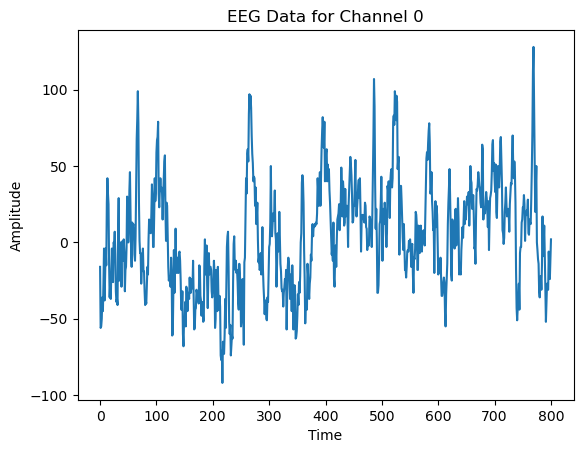

In [35]:
data = pd.read_csv('subject.csv')
channel_data = data.iloc[:, 2]
print(channel_data)
plt.plot(channel_data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Data for Channel 0')
plt.show()


        

In [22]:
import mne
import matplotlib.pyplot as plt
import pandas as pd
r = mne.io.read_raw_edf('S001R01.edf')
start_time=5.0
stop_time=10.0
dd = r.copy().crop(start_time, stop_time).to_data_frame()
print(dd.head())
dd.to_csv('2')


Extracting EDF parameters from /home/jovyan/PlanetaryComputerExamples/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
      time  Fc5.  Fc3.  Fc1.  Fcz.  Fc2.  Fc4.  Fc6.  C5..  C3..  ...  P8..  \
0  0.00000   2.0  12.0  11.0  20.0  20.0  31.0  55.0  18.0   6.0  ... -29.0   
1  0.00625  -1.0  -1.0 -12.0  -6.0   2.0  19.0  42.0  12.0  -3.0  ... -15.0   
2  0.01250   4.0   9.0   2.0  13.0  24.0  41.0  65.0  14.0   4.0  ... -12.0   
3  0.01875   7.0  21.0  23.0  35.0  47.0  52.0  71.0  10.0  17.0  ... -12.0   
4  0.02500   5.0  12.0   6.0  25.0  29.0  27.0  41.0  10.0  14.0  ...  19.0   

   Po7.  Po3.  Poz.  Po4.  Po8.  O1..  Oz..  O2..  Iz..  
0 -29.0 -34.0 -44.0 -48.0 -54.0 -11.0 -47.0 -11.0   4.0  
1 -27.0 -29.0 -34.0 -37.0 -42.0  -7.0 -38.0  -7.0   6.0  
2 -12.0 -16.0 -27.0 -23.0 -30.0   1.0 -26.0  -2.0  15.0  
3   7.0  -2.0 -25.0 -20.0 -26.0  12.0 -21.0   0.0  21.0  
4  10.0  12.0  -5.0   7.0   3.0  20.0 -15.0   5.0  15.0  

[5 rows 

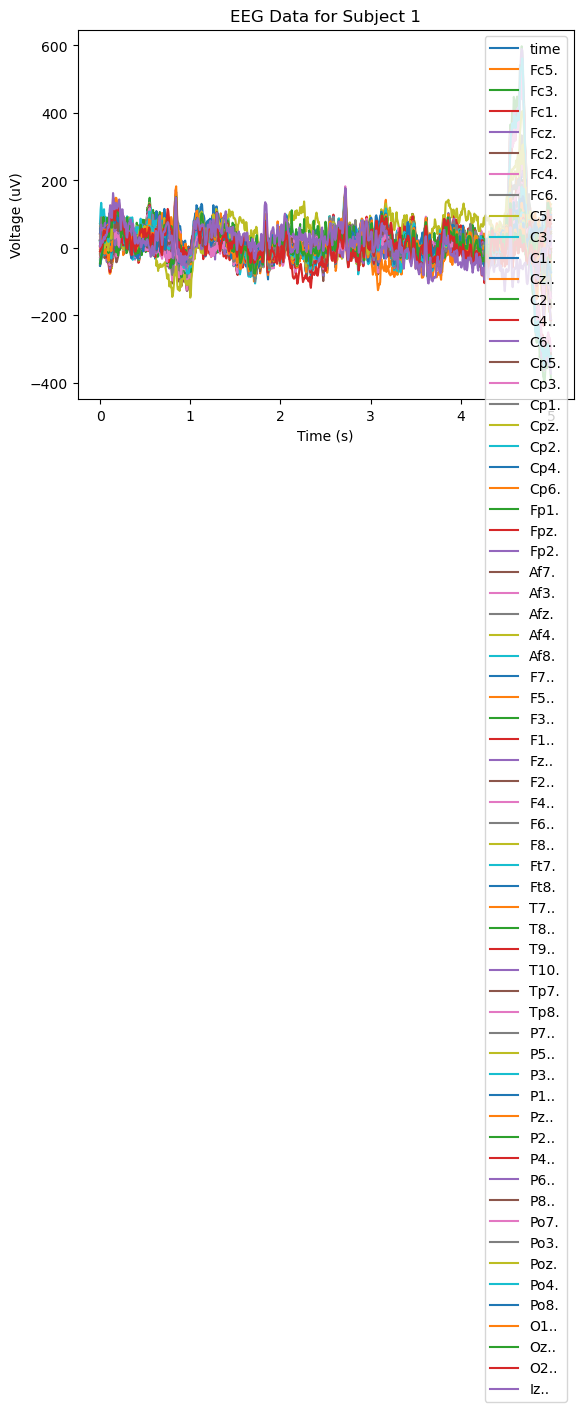

In [42]:
NewData = pd.read_csv('2')
lanes = NewData.columns[1:]
for lane in lanes:
    plt.plot(NewData['time'], NewData[lane], label=lane)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.title('EEG Data for Subject 1')
plt.legend()
plt.show()